# Desafio2 -  Bootcamp IGTI: Engenheiro(a) de Machine Learning

**Este é o desafio do Módulo 2 - Modelos Preditivos e Séries Temporais, do Bootcamp de Engenheiro(a) de Machine Learning do IGTI. O objetivo deste desafio é exercitar conceitos apresentados durante o módulo, tais como análise exploratória de dados (EDA) e comparação e treinamento de modelos de classificação.**

## Dataset

**O dataset utilizado neste desafio é o "Banknote authentication", disponível no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/banknote+authentication). Este dataset consiste em atributos contínuos (variance, skewness, curtosis e entropy) extraídos de imagens de cédulas reais e falsificadas através de uma etapa de processamento de sinais (transformação de Wavelet), além da indicação se o exemplo é de uma cédula genuína (class = 0) ou falsificada (class = 1).**

## Atividades

**Os alunos deverão desempenhar as seguintes atividades:**
1. Acessar o ambiente Google Colaboratory (recomendado) ou qualquer ambiente de desenvolvimento em Python.
2. Carregar o dataset https://pycourse.s3.amazonaws.com/banknote_authentication.txt para análise utilizando o pandas.
3. Divida o dataset utilizando a função train_test_split, conforme:
    * Conjunto de treino (70%);
    * Conjunto de teste (30%);
    * random_state=1.
4. Utilize a variável “class” como saída e as demais como entrada dos modelos.
5. Para a implementação dos algoritmos, utilize as seguintes definições (do sklearn):
    * Algoritmo KNN:
        * clf_KNN = KNeighborsClassifier(n_neighbors=5)
    * Algoritmo Árvore de Decisão (Decision Tree):
        * clf_arvore = DecisionTreeClassifier(random_state=1)
    * Algoritmo Floresta Aleatória (Random Forest):
        * clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
    * Algoritmo SVM:
        * clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)
    * Algoritmo Rede MLP:
        * clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)
6. Treine os modelos com os dados de treino e avalie suas performances com os dados de teste. Utilize a acurácia como métrica de avaliação.
7. Responda às questões objetivas.


In [22]:
# importação das libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
link = "https://pycourse.s3.amazonaws.com/banknote_authentication.txt"

In [3]:
df = pd.read_csv(link,header=None,names=['variance','skewness','curtosis','entropy','class'])

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Qual o tamanho desse dataset (número de linhas, número de colunas)? 

In [6]:
df.shape

(1372, 5)

### Qual variável possui o maior range (diferença entre valor máximo e mínimo)? 

In [8]:
df.describe()
#Skewness

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Qual a média da coluna skewness? 

1.922353

### Qual a média da coluna entropy? 

-1.191657

Qual a mediana da coluna variance? 

0.496180

### Qual o desvio padrão da coluna curtosis? 

4.310030

### Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? 

In [15]:
df['class'].value_counts() / df['class'].count() * 100

0    55.539359
1    44.460641
Name: class, dtype: float64

### Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? 

In [16]:
df[['skewness','curtosis']].corr(method='pearson')

,skewness,curtosis
skewness,1.000000,-0.786895
curtosis,-0.786895,1.000000


In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((960, 4), (960,), (412, 4), (412,))

### Qual a acurácia do KNN no conjunto de teste? 

## a. Algoritmo KNN:

In [24]:
n = 5
clf_KNN = KNeighborsClassifier(n_neighbors=n)
clf_KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
y_pred_knn = clf_KNN.predict(X_test)

In [32]:
Acc_knn = accuracy_score(y_test, y_pred_knn)
print(f'A acurácia para o modelo KNN é:{round(Acc_knn,5)}')

A acurácia para o modelo KNN é:0.99757


## b. Algoritmo Árvore de Decisão (Decision Tree):


In [33]:
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
y_pred_dtree = clf_arvore.predict(X_test)

### Qual a acurácia da Árvore de Decisão no conjunto de teste? 

In [35]:
Acc_dtree = accuracy_score(y_test, y_pred_dtree)
print(f'A acurácia para o modelo KNN é:{round(Acc_dtree,5)}')

A acurácia para o modelo KNN é:0.98786


## c. Algoritmo Floresta Aleatória (Random Forest):

In [36]:
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=1)

In [37]:
y_pred_rand_tree = clf_floresta.predict(X_test)

### Qual a acurácia do Random Forest no conjunto de teste? 

In [38]:
Acc_rand_tree = accuracy_score(y_test, y_pred_rand_tree)
print(f'A acurácia para o modelo KNN é:{round(Acc_rand_tree,5)}')

A acurácia para o modelo KNN é:0.99515


### Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), qual feature melhor contribuiu para a predição de class? 

Text(0.5, 0, 'Random Forest Feature Importance')

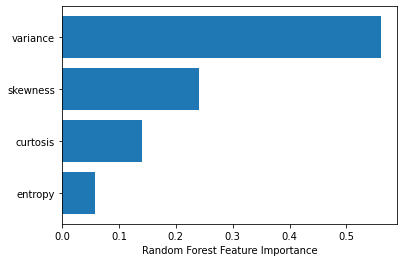

In [90]:
feat_importances = clf_floresta.feature_importances_.argsort()
plt.barh(df.columns[feat_importances], clf_floresta.feature_importances_[feat_importances])
plt.xlabel('Random Forest Feature Importance')

### Qual o valor da importância relativa da feature skewness? 

In [92]:
forest_importances = pd.Series(clf_floresta.feature_importances_, index=X_train.columns)
forest_importances

variance    0.560667
skewness    0.240586
curtosis    0.140228
entropy     0.058519
dtype: float64

## d. Algoritmo SVM:


In [94]:
clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)
clf_svm.fit(X_train,y_train)

SVC(gamma='auto', random_state=1)

In [95]:
y_pred_svm = clf_svm.predict(X_test)

### Qual a acurácia do SVM no conjunto de teste? 

In [96]:
Acc_svm = accuracy_score(y_test, y_pred_svm)
print(f'A acurácia para o modelo KNN é:{round(Acc_svm,5)}')

A acurácia para o modelo KNN é:1.0


## e. Algoritmo Rede MLP:

In [97]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,),
solver='lbfgs',
random_state=1)
clf_mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(2,), random_state=1, solver='lbfgs')

In [98]:
y_pred_mlp = clf_mlp.predict(X_test)

### Qual a acurácia da rede MLP no conjunto de teste? 

In [99]:
Acc_mpl = accuracy_score(y_test, y_pred_mlp)
print(f'A acurácia para o modelo KNN é:{round(Acc_mpl,5)}')

A acurácia para o modelo KNN é:1.0
